<a href="https://colab.research.google.com/github/LalyAprendiendo/Intro/blob/main/Clase01_unlu_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **CLASE 01- ANÁLISIS EXPLORATORIO DE DATOS** </center>


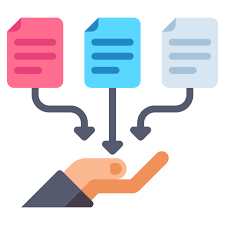  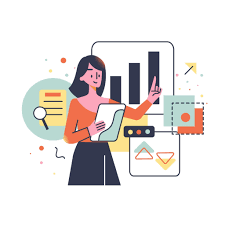  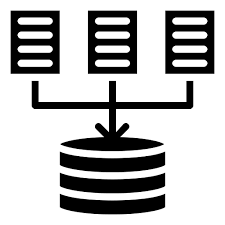

# **Método Local**

In [ ]:
# Importación de librerias
import pandas as pd
import io
import os

In [ ]:
from google.colab import files

# Creamos el objeto uploaded
uploaded = files.upload()

In [ ]:
# Visualizamos el objeto
uploaded

In [ ]:
# Método type:
type(uploaded)

In [ ]:
# Levantamos el csv en formato DF usando pandas:
df = pd.read_csv(io.BytesIO(uploaded['dnrpa-robos-recuperos-autos-202201.csv']),sep=",")
df.head(10) # vemos los 10 primeros registros

# **Método Drive**

In [ ]:
# Montamos google DRIVE
from google.colab import drive
import os
drive.mount('/content/gdrive')

# Establecer ruta de acceso en dr:
print(os.getcwd())
os.chdir('/content/gdrive/My Drive/Unlu/')

In [ ]:
# Levantamos el csv en un df con pandas:
df2 = pd.read_csv('dnrpa-robos-recuperos-autos-202201.csv',sep=',')
df2.head(10)

In [ ]:
# Tamaño data set:
df2.shape
print('El df tiene {} instancias y {} features'.format(df2.shape[0],df2.shape[1]))

In [ ]:
# Tipo de variables:
df2.dtypes

## **Breve descripción gráfica**

### Marca más robada

In [ ]:
df2['automotor_marca_descripcion'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Marcas más robadas');

### Modelos más robados

In [ ]:
df2['automotor_modelo_descripcion'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Modelos más robados');

### Robos según género

In [ ]:
df2['titular_genero'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Robos por género');

### Procedencia del titular

In [ ]:
df2['titular_domicilio_provincia'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular');

# **URL-Github**


https://github.com/jbagnato/machine-learning

**csv**

https://raw.githubusercontent.com/jbagnato/machine-learning/master/comprar_alquilar.csv

In [ ]:
# Archivo en formato csv
# url = 'https://raw.githubusercontent.com/jbagnato/machine-learning/master/comprar_alquilar.csv'
df = pd.read_csv('https://raw.githubusercontent.com/jbagnato/machine-learning/master/comprar_alquilar.csv')
df.head(10)

**JSON**

In [ ]:
# De una URL seleccionamos un archivo json
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
df.head()

In [ ]:
url='https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json'
df= pd.read_json(url)
df.head()

# **OpenML**

**OpenML** es una plataforma abierta para compartir conjuntos de datos, algoritmos y experimentos, que permite aprender ML.

In [ ]:
# soporte para cargar dataset de https://www.openml.org/
!pip install openml
import openml

In [ ]:
# Lista de data frames OpenML:
datasets_df = openml.datasets.list_datasets(output_format='dataframe')
print(datasets_df.head())

# **Descargar un datset de OpenML**

In [ ]:
# dataset #5:
dataset = openml.datasets.get_dataset(5)
dataset

In [ ]:
print(dataset.description)

https://www.openml.org/d/1461

In [ ]:
#Bank-Marketing dataset https://www.openml.org/d/1461
dataset = openml.datasets.get_dataset(1461)

# Print a summary
print(f"This is dataset '{dataset.name}', the target feature is "
      f"'{dataset.default_target_attribute}'")
print(f"URL: {dataset.url}")
print(dataset.description[:800])

In [ ]:
# get data:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)

In [ ]:
# Atributos:
attribute_names

In [ ]:
# Indicador de categoría
categorical_indicator

In [ ]:
# Valores de X (características):
X


**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
# Renombramos las features:
X = X.rename(columns={'V1':'age','V2':' job','V3':' marital', 'V4':'education', 'V5': 'default', 'V6':'balance', 'V7':'housing',
                  'V8':'loan','V9':'contact','V10':'day','V11':'month','V12':'duration','V13':'campaign',
                  'V14':'pdays','V15':'previous','V16':'poutcome'})
X

In [ ]:
# Variable target/objetivo:
y

In [ ]:
# Concatenamos las X e Y:
import pandas as pd

combined_data = pd.concat([X, y], axis=1)
combined_data

## **Limpieza de datos**

In [ ]:
# Método head:
df2.head()

In [ ]:
# Info:
df2.info()

In [ ]:
# Vemos la cantidad de nulos:
df2.isnull().sum()

In [ ]:
df2.isna().sum()

In [ ]:
# Seleccionamos una variable:
df2['titular_pais_nacimiento']

In [ ]:
df2['titular_pais_nacimiento_id'][2]

In [ ]:
# Método value_counts:
df2['titular_pais_nacimiento'].value_counts()

In [ ]:
df2['titular_pais_nacimiento_id'].value_counts()

In [ ]:
# Elimina los registros NA con el método dropna
df2 = df2.dropna()
df2

In [ ]:
df2.info()

## **KAGGLE**


https://kaggle.com/datasets

In [ ]:
# Montamos google DRIVE
from google.colab import drive
import os
drive.mount('/content/gdrive')

# Establecer ruta de acceso en dr:
print(os.getcwd())
os.chdir('/content/gdrive/My Drive/kaggle/')

In [ ]:
!ls -lai '/content/gdrive/My Drive/kaggle'

In [ ]:
from google.colab import files
files.upload()  # Esto me permite cargar el archivo .json

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # establecer permiso     

In [ ]:
# !kaggle datasets download -d arianazmoudeh/airbnbopendata

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

In [ ]:
#descomprime the zip files:
# !unzip \*.zip  && rm *.zip

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(5)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [ ]:
# media BMI
data['bmi'].mean()

In [ ]:
# median BMI
data['bmi'].median()

In [ ]:
mean_bmi = data['bmi'].mean()

In [ ]:
# Rellenamos los na con mean(BMI):
data['bmi'] = data['bmi'].fillna(mean_bmi)

In [ ]:
data.info()

In [ ]:
data.head()

Ejemplo simple de como reemplazar valores

In [ ]:
# Creamos un data frame ficticio:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'a', 'c']})

In [ ]:
df

In [ ]:
# Reemplazamos los valores necesarios:
df = df.replace({'a':0, 'b':1, 'c':2})
df

### **ACTIVIDAD DE LA CLASE:**

Buscar una base de datos donde puedan aplicar lo que vamos a ver a lo largo del curso. La idea es que la base sea lo más cruda posible (sin ninguna tarea precia de pre procesamiento).